# References

DataCamp :: Intermediate Python    
DataCamp :: Introduction to data Visualisation in Python

In [2]:
# imports
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from numpy.random import normal
from numpy import hstack
from statsmodels.distributions.empirical_distribution import ECDF

In [ ]:
# getting help

# help(plt.hist)
# help(plt.legend)


In [10]:
# settings
import warnings
warnings.filterwarnings('ignore')
#print all rows of a df in ipython shell 
pd.set_option('display.max_rows', None)
#print all columns of a df in ipython shell 
pd.set_option('display.max_columns', None)

In [ ]:
# Binder upload
# 1. goto mybinder.com
# 2. add the github repository link, branch, filename, requirements.txt should be filled with dependencies
# 3. remove path from read_csv
# 4. share the link

# Data preparation

In [3]:
# load data

# path = 'e:\PycharmProjects\Visualisation'
path = os.path.abspath(os.getcwd())

gapminder = pd.read_csv(path +'/data/gapminder_tidy.csv', index_col= ['Year', 'region', 'Country']).sort_index()
degree_percent_women = pd.read_csv(path +'/data/percent-bachelors-degrees-women-usa.csv')
auto = pd.read_csv(path + '/data/auto-mpg.csv')

stocks = pd.read_csv(path+'\data\\stocks.csv', parse_dates=['Date'],index_col='Date')
aapl = pd.Series(stocks.AAPL)
ibm = pd.Series(stocks.IBM)
csco = pd.Series(stocks.CSCO)
msft = pd.Series(stocks.MSFT)

# print(stocks.head())
# print(type(aapl))


In [4]:
# basic summary

#degree_percent_women
#degree_percent_women.columns
#degree_percent_women.shape
# count the null values
#degree_percent_women.isna().sum()

# count different values
#df['column'].value_counts()


In [16]:
# create datasets from basic data
# groupby, count, select
by_year = gapminder.groupby(level = ['Year'])
# Create the dictionary: aggregator
aggregator = {'population':'sum'}

# Aggregate by_year_country using the dictionary: aggregated
aggregated = by_year.agg(aggregator) 

# drop index column
aggregated.reset_index(drop=False, inplace=True)

# get column values
hp = auto['hp']
mpg = auto['mpg']

# Basic plots with Mathplotlib

## Basic line and scatter plot

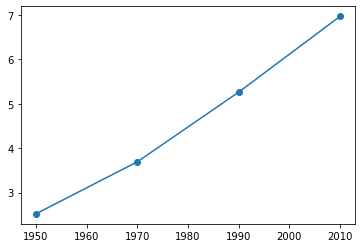

In [17]:
# ex 1

year = [1950, 1970, 1990, 2010] 
pop = [2.519, 3.692, 5.263, 6.972] 
plt.scatter(year, pop)
plt.plot(year, pop)
plt.show()

## Basic histogram

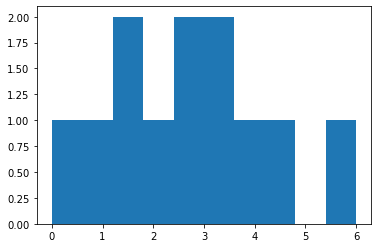

In [7]:
# ex 1
values = [0,0.6,1.4,1.6,2.2,2.5,2.6,3.2,3.5,3.9,4.2,6] 
plt.hist(values, bins = 10)
plt.show()

## Basic customisation :: xlabel, ylabel, title, yticks with new values

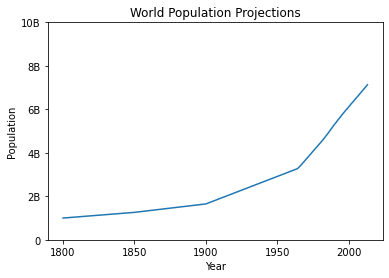

In [18]:
# ex 1

# data
year = aggregated['Year']
# to have small version of scientific notation
pop = (aggregated['population']/1000000000).round(2)

# Add more data
year = [1800, 1850, 1900] + year.tolist()
pop = [1.0, 1.262, 1.650] + pop.tolist()

# create the default line plot
plt.plot(year, pop)

# customisation
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('World Population Projections')
plt.yticks([0, 2, 4, 6, 8, 10], ['0', '2B', '4B', '6B', '8B', '10B'])

# view
plt.show()

# Plotting distributions

## Empiricaldistribution function (ECDF)

P(x<20): 0.159
P(x<40): 0.665
P(x<60): 1.000


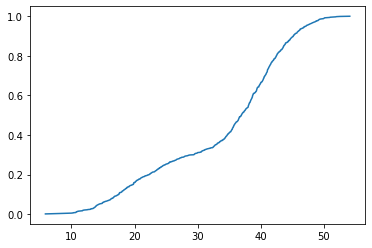

In [3]:
# fit an empirical cdf to a bimodal dataset

# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack((sample1, sample2))
# fit a cdf
ecdf = ECDF(sample)
# get cumulative probability for values
print('P(x<20): %.3f' % ecdf(20))
print('P(x<40): %.3f' % ecdf(40))
print('P(x<60): %.3f' % ecdf(60))
# plot the cdf
plt.plot(ecdf.x, ecdf.y)
plt.show()

# Plotting multiple graphs

## Plotting many graphs on common axes

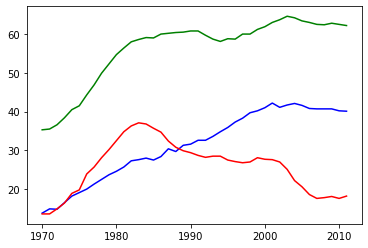

In [9]:
# ex 1
# prepare data
year = degree_percent_women['Year']
physical_sciences = degree_percent_women['Physical Sciences']
computer_science = degree_percent_women['Computer Science']
communication = degree_percent_women['Communications and Journalism']
education = degree_percent_women['Education']
health = degree_percent_women['Health Professions']

# Plot in blue the % of degrees awarded to women in the Physical Sciences
plt.plot(year, physical_sciences, color='blue')

# Plot in red the % of degrees awarded to women in Computer Science
plt.plot(year, computer_science, color='red')

# Plot in red the % of degrees awarded to women in Communications and Journalism
plt.plot(year, communication, color='green')

# Display the plot
plt.show()

## Plotting many graphs using axes() command

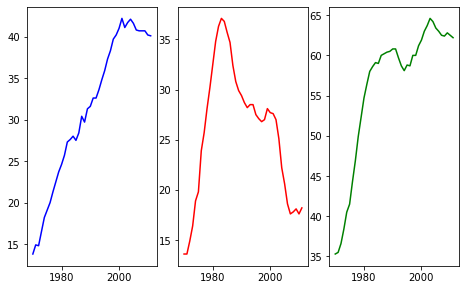

In [10]:
# ex 1
# Create plot axes for the first line plot
plt.axes([0.05, 0.05, 0.3, 0.9])

# Plot in blue the % of degrees awarded to women in the Physical Sciences
plt.plot(year, physical_sciences, color='blue')

# Create plot axes for the second line plot
plt.axes([0.4, 0.05,0.3, 0.9])

# Plot in red the % of degrees awarded to women in Computer Science
plt.plot(year, computer_science, color='red')

# Create plot axes for the third line plot
plt.axes([0.75, 0.05, 0.3, 0.9])

# Plot in green the % of degrees awarded to women in Communications and Journalism
plt.plot(year, communication, color='green')

# Display the plot
plt.show()

## Plotting many graphs using subplot() command

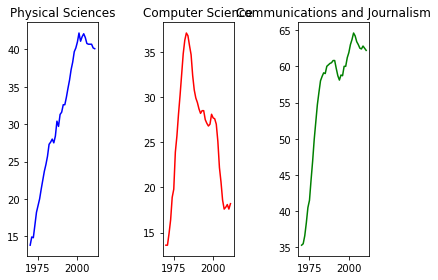

In [11]:
# ex 1
# Create a figure with 1x2 subplot and make the left subplot active
plt.subplot(1,3,1)

# Plot in blue the % of degrees awarded to women in the Physical Sciences
plt.plot(year, physical_sciences, color='blue')
plt.title('Physical Sciences')

# Make the right subplot active in the current 1x2 subplot grid
plt.subplot(1,3,2)

# Plot in red the % of degrees awarded to women in Computer Science
plt.plot(year, computer_science, color='red')
plt.title('Computer Science')

# Make the right subplot active in the current 1x2 subplot grid
plt.subplot(1,3,3)

# Plot in green the % of degrees awarded to women in Communications and Journalism
plt.plot(year, communication, color='green')
plt.title('Communications and Journalism')

# Use plt.tight_layout() to improve the spacing between subplots
plt.tight_layout()
plt.show()

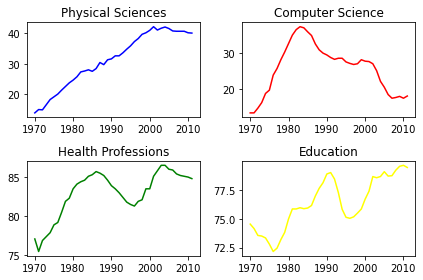

In [12]:
# ex 2
# Create a figure with 2x2 subplot layout and make the top left subplot active
plt.subplot(2,2,1)

# Plot in blue the % of degrees awarded to women in the Physical Sciences
plt.plot(year, physical_sciences, color='blue')
plt.title('Physical Sciences')

# Make the top right subplot active in the current 2x2 subplot grid 
plt.subplot(2,2,2)

# Plot in red the % of degrees awarded to women in Computer Science
plt.plot(year, computer_science, color='red')
plt.title('Computer Science')

# Make the bottom left subplot active in the current 2x2 subplot grid
plt.subplot(2,2,3)

# Plot in green the % of degrees awarded to women in Health Professions
plt.plot(year, health, color='green')
plt.title('Health Professions')

# Make the bottom right subplot active in the current 2x2 subplot grid
plt.subplot(2,2,4)

# Plot in yellow the % of degrees awarded to women in Education
plt.plot(year, education, color='yellow')
plt.title('Education')

# Improve the spacing between subplots and display them
plt.tight_layout()
plt.show()


# Customisation

## Controlling axis extents (axis(), xlim(), ylim())

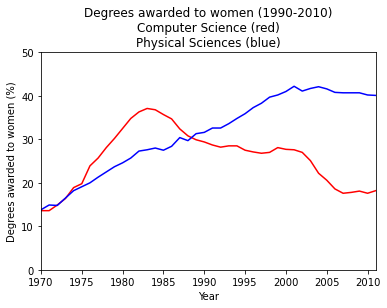

<Figure size 432x288 with 0 Axes>

In [13]:
# ex 1
# Plot the % of degrees awarded to women in Computer Science and the Physical Sciences
plt.plot(year,computer_science, color='red')
plt.plot(year, physical_sciences, color='blue')

# Add the axis labels
plt.xlabel('Year')
plt.ylabel('Degrees awarded to women (%)')

# Set the x-axis range
plt.xlim(min(year),max(year))

# Set the y-axis range
plt.ylim(0, 50)

# Add a title and display the plot
plt.title('Degrees awarded to women (1990-2010)\nComputer Science (red)\nPhysical Sciences (blue)')
plt.show()

# Save the image as 'xlim_and_ylim.png'
plt.savefig('xlim_and_ylim.png')

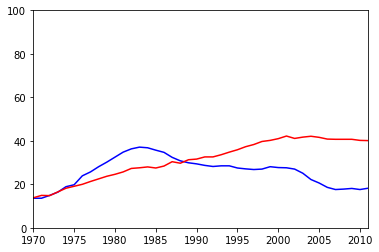

<Figure size 432x288 with 0 Axes>

In [14]:
# ex 2
# Plot in blue the % of degrees awarded to women in Computer Science
plt.plot(year,computer_science, color='blue')

# Plot in red the % of degrees awarded to women in the Physical Sciences
plt.plot(year, physical_sciences,color='red')

# Set the x-axis and y-axis limits
plt.axis([min(year),max(year),0,100])

# Show the figure
plt.show()

# Save the figure as 'axis_limits.png'
plt.savefig('axis_limits.png')

## Legends, annotations, and styles

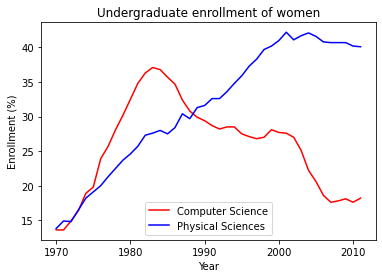

In [15]:
# ex 1 
# Specify the label 'Computer Science'
plt.plot(year, computer_science, color='red', label='Computer Science') 

# Specify the label 'Physical Sciences' 
plt.plot(year, physical_sciences, color='blue', label='Physical Sciences')

# Add a legend at the lower center
plt.legend(loc = 'lower center')

# Add axis labels and title
plt.xlabel('Year')
plt.ylabel('Enrollment (%)')
plt.title('Undergraduate enrollment of women')
plt.show()

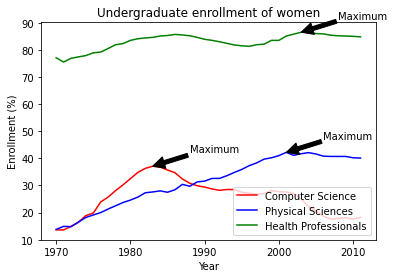

In [16]:
# ex 2
# Plot with legend as before
plt.plot(year, computer_science, color='red', label='Computer Science')
plt.plot(year, physical_sciences, color='blue', label='Physical Sciences')
plt.plot(year, health, color='green', label='Health Professionals')
plt.legend(loc='lower right')

# Compute the maximum enrollment of women in Computer Science: cs_max
cs_max = computer_science.max()

# Calculate the year in which there was maximum enrollment of women in Computer Science: yr_max
yr_max = year[computer_science.argmax()]

# Compute the maximum enrollment of women in Health Professionals: hp_max
hp_max = health.max()

# Calculate the year in which there was maximum enrollment of women in Health Professionals: yr_max_hp
yr_max_hp = year[health.argmax()]

# Compute the maximum enrollment of women in Physical Sciences: ps_max
ps_max = physical_sciences.max()

# Calculate the year in which there was maximum enrollment of women in Physical Sciences: yr_max_hp
yr_max_ps = year[physical_sciences.argmax()]

# Add a black arrow annotation
plt.annotate('Maximum',xy=(yr_max, cs_max),xytext=(yr_max+5, cs_max+5), arrowprops=dict(facecolor='black'))
plt.annotate('Maximum',xy=(yr_max_hp, hp_max),xytext=(yr_max_hp+5, hp_max+5), arrowprops=dict(facecolor='black'))
plt.annotate('Maximum',xy=(yr_max_ps, ps_max),xytext=(yr_max_ps+5, ps_max+5), arrowprops=dict(facecolor='black'))

# Add axis labels and title
plt.xlabel('Year')
plt.ylabel('Enrollment (%)')
plt.title('Undergraduate enrollment of women')
plt.show()

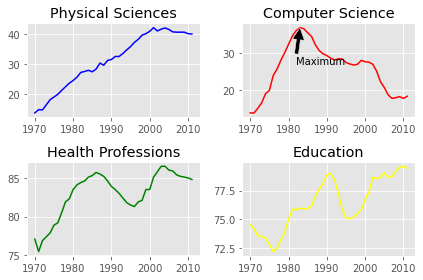

In [17]:
# ex 3
# Set the style to 'ggplot'
#help(plt.style.use)
#plt.style.available
plt.style.use('ggplot')

# Create a figure with 2x2 subplot layout
plt.subplot(2, 2, 1)

# Plot the enrollment % of women in the Physical Sciences
plt.plot(year, physical_sciences, color='blue')
plt.title('Physical Sciences')

# Plot the enrollment % of women in Computer Science
plt.subplot(2, 2, 2)
plt.plot(year, computer_science, color='red')
plt.title('Computer Science')

# Add annotation
cs_max = computer_science.max()
yr_max = year[computer_science.argmax()]
plt.annotate('Maximum', xy=(yr_max, cs_max), xytext=(yr_max-1, cs_max-10), arrowprops=dict(facecolor='black'))

# Plot the enrollmment % of women in Health professions
plt.subplot(2, 2, 3)
plt.plot(year, health, color='green')
plt.title('Health Professions')

# Plot the enrollment % of women in Education
plt.subplot(2, 2, 4)
plt.plot(year, education, color='yellow')
plt.title('Education')

# Improve spacing between subplots and display them
plt.tight_layout()
plt.show()


# Plotting bivariate functions ex:. f(x,y)=x+y

## meshgrid

[ 1.    3.25  5.5   7.75 10.  ]
[ 2.  4.  6.  8. 10. 12. 14. 16. 18. 20.]
[[ 1.    3.25  5.5   7.75 10.  ]
 [ 1.    3.25  5.5   7.75 10.  ]
 [ 1.    3.25  5.5   7.75 10.  ]
 [ 1.    3.25  5.5   7.75 10.  ]
 [ 1.    3.25  5.5   7.75 10.  ]
 [ 1.    3.25  5.5   7.75 10.  ]
 [ 1.    3.25  5.5   7.75 10.  ]
 [ 1.    3.25  5.5   7.75 10.  ]
 [ 1.    3.25  5.5   7.75 10.  ]
 [ 1.    3.25  5.5   7.75 10.  ]]
[[ 2.  2.  2.  2.  2.]
 [ 4.  4.  4.  4.  4.]
 [ 6.  6.  6.  6.  6.]
 [ 8.  8.  8.  8.  8.]
 [10. 10. 10. 10. 10.]
 [12. 12. 12. 12. 12.]
 [14. 14. 14. 14. 14.]
 [16. 16. 16. 16. 16.]
 [18. 18. 18. 18. 18.]
 [20. 20. 20. 20. 20.]]
[[ 3.    5.25  7.5   9.75 12.  ]
 [ 5.    7.25  9.5  11.75 14.  ]
 [ 7.    9.25 11.5  13.75 16.  ]
 [ 9.   11.25 13.5  15.75 18.  ]
 [11.   13.25 15.5  17.75 20.  ]
 [13.   15.25 17.5  19.75 22.  ]
 [15.   17.25 19.5  21.75 24.  ]
 [17.   19.25 21.5  23.75 26.  ]
 [19.   21.25 23.5  25.75 28.  ]
 [21.   23.25 25.5  27.75 30.  ]]


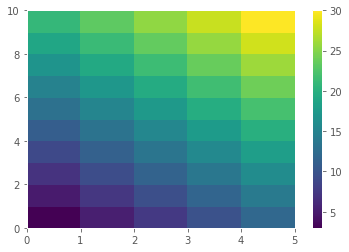

In [18]:
# ex 1
# Generate two 1-D arrays: u, v
u = np.linspace(1, 10, 5)
v = np.linspace(2, 20, 10)
print(u)
print(v)

# Generate 2-D arrays from u and v: X, Y
X,Y = np.meshgrid(u,v)
print(X)
print(Y)

# Compute Z based on X and Y
Z = X + Y
print(Z)
# Display the resulting image with pcolor()
plt.pcolor(Z)
plt.colorbar()
plt.show()


# Bivariate distributions

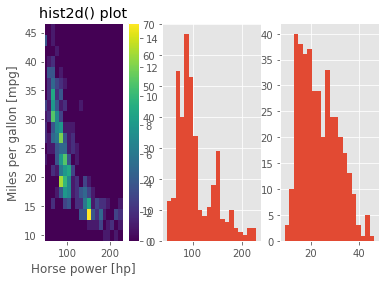

In [19]:
# ex 1
# visualise bivariate and individual distributions
# generate data
#print(auto.columns)


# Generate a 2-D histogram
#plt.hist2d(hp, mpg, bins=(20,20), range=((40,235), (8,48)))
plt.subplot(1,3,1)
plt.hist2d(hp, mpg, bins=(20,20), range=((min(hp),max(hp)), (min(mpg),max(mpg))))

# Add a color bar to the histogram
plt.colorbar()

plt.xlabel('Horse power [hp]')
plt.ylabel('Miles per gallon [mpg]')
plt.title('hist2d() plot')

plt.subplot(1,3,2)
plt.hist(hp, bins=20, range=(min(hp),max(hp)))

plt.subplot(1,3,3)
plt.hist(mpg, bins=20, range=(min(mpg),max(mpg)))

# Add labels, title, and display the plot

plt.show()

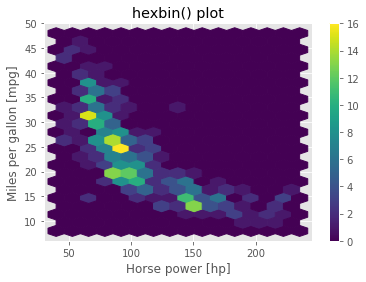

In [20]:
# ex 2
# Generate a 2d histogram with hexagonal bins
plt.hexbin(hp, mpg, gridsize=(15, 12), extent=(40, 235, 8, 48))

# Add a color bar to the histogram
plt.colorbar()

# Add labels, title, and display the plot
plt.xlabel('Horse power [hp]')
plt.ylabel('Miles per gallon [mpg]')
plt.title('hexbin() plot')
plt.show()

# Statistical visualisation :: seaborn

## Linear regression plot

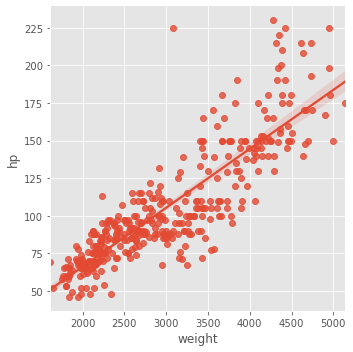

In [21]:
# ex 1
# Plot a linear regression between 'weight' and 'hp'
sns.lmplot(x='weight', y='hp', data=auto)

# Display the plot
plt.show()

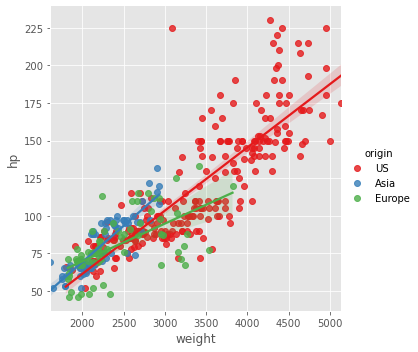

In [22]:
# ex 2
# Plot a linear regression between 'weight' and 'hp', with a hue of 'origin' and palette of 'Set1'
sns.lmplot(x='weight', y='hp', data=auto, hue='origin', palette='Set1')

# Display the plot
plt.show()

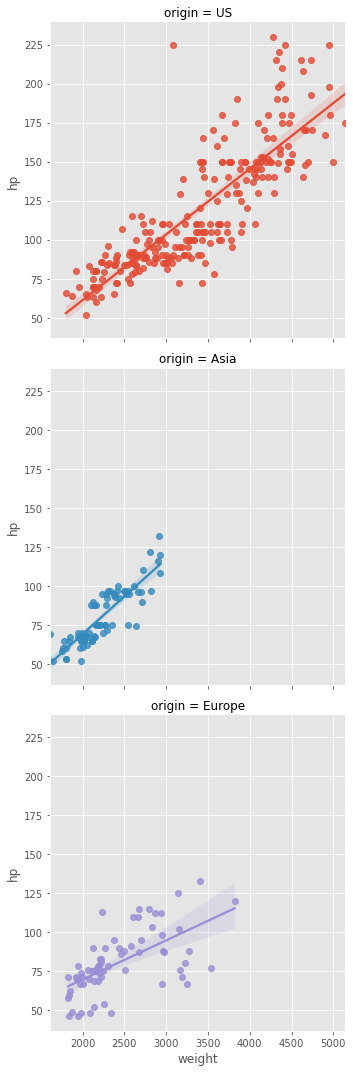

In [23]:
# ex 3
# Plot linear regressions between 'weight' and 'hp' grouped row-wise by 'origin'
sns.lmplot(x='weight', y='hp', data=auto, hue='origin', row='origin')

# Display the plot
plt.show()

## Residual plot

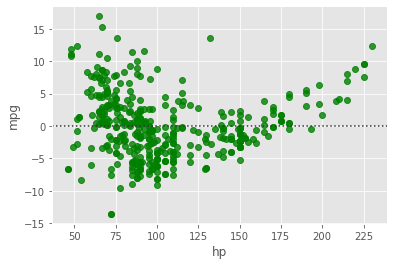

In [24]:
# ex 1
# Generate a green residual plot of the regression between 'hp' and 'mpg'
sns.residplot(x='hp', y='mpg', data=auto, color='green')

# Display the plot
plt.show()

## Regression plot

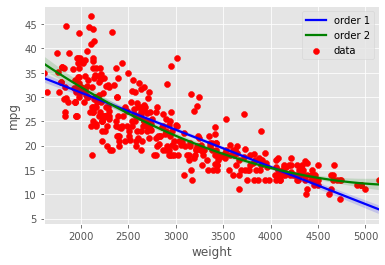

In [25]:
# ex 1

# Generate a scatter plot of 'weight' and 'mpg' using red circles
plt.scatter(auto['weight'], auto['mpg'], label='data', color='red', marker='o')

# Plot in blue a linear regression of order 1 between 'weight' and 'mpg'
sns.regplot(x='weight', y='mpg', scatter=None, data=auto, color='blue', label='order 1')

# Plot in green a linear regression of order 2 between 'weight' and 'mpg'
sns.regplot(x='weight', y='mpg', scatter=None, data=auto, color='green', label='order 2', order=2)

# Add a legend and display the plot
plt.legend(loc='upper right')
plt.show()

## Univariate data visualisation :: Stripplot

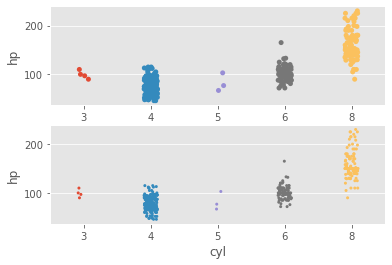

In [27]:
# ex 1
# Make a strip plot of 'hp' grouped by 'cyl'
plt.subplot(2,1,1)
sns.stripplot(x='cyl', y='hp', data=auto)

# Make the strip plot again using jitter and a smaller point size
plt.subplot(2,1,2)
sns.stripplot(x='cyl', y='hp', data=auto, jitter=True, size=3)

# Display the plot
plt.show()

## Univariate data visualisation :: Swarmplot

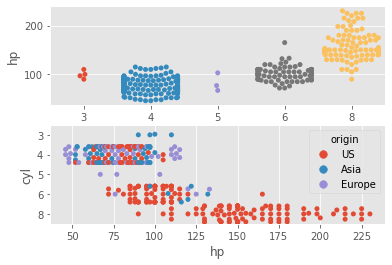

In [28]:
# ex 1
# Generate a swarm plot of 'hp' grouped horizontally by 'cyl'
plt.subplot(2,1,1)
sns.swarmplot(x='cyl', y='hp', data=auto)

# Generate a swarm plot of 'hp' grouped vertically by 'cyl' with a hue of 'origin'
plt.subplot(2,1,2)
sns.swarmplot(x='hp', y='cyl', data=auto, hue='origin',  orient='h')

# Display the plot
plt.show()

## Univariate data visualisation :: Violinplot

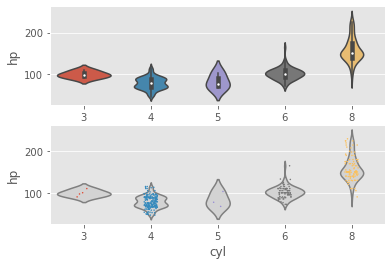

In [30]:
# ex 1
# Generate a violin plot of 'hp' grouped horizontally by 'cyl'
plt.subplot(2,1,1)
sns.violinplot(x='cyl', y='hp', data=auto)

# Generate the same violin plot again with a color of 'lightgray' and without inner annotations
plt.subplot(2,1,2)
sns.violinplot(x='cyl', y='hp', data=auto, inner=None, color='lightgray')

# Overlay a strip plot on the violin plot
sns.stripplot(x='cyl', y='hp', data=auto, jitter=True, size=1.5)

# Display the plot
plt.show()

In [ ]:
## Multivariate data visualisation :: Jointplot

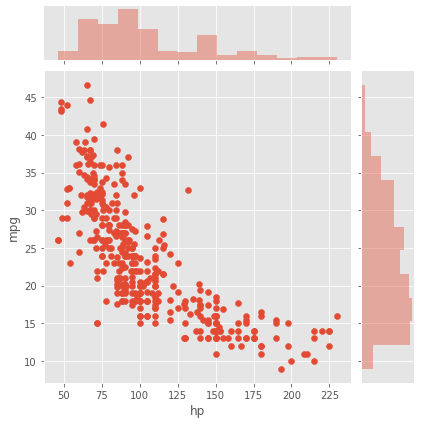

In [31]:
# ex 1
# Generate a joint plot of 'hp' and 'mpg'
sns.jointplot(x='hp', y='mpg', data=auto)

# Display the plot
plt.show()

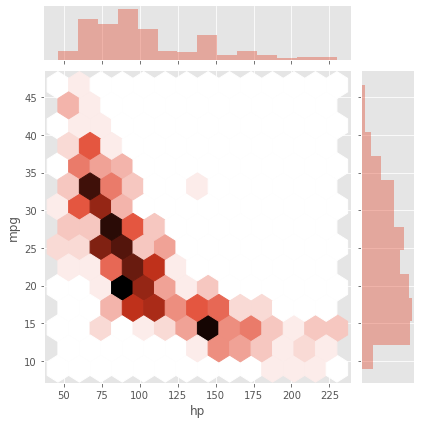

In [32]:
# ex 2
# Generate a joint plot of 'hp' and 'mpg' using a hexbin plot
sns.jointplot(x='hp', y='mpg', data=auto, kind='hex')

# Display the plot
plt.show()

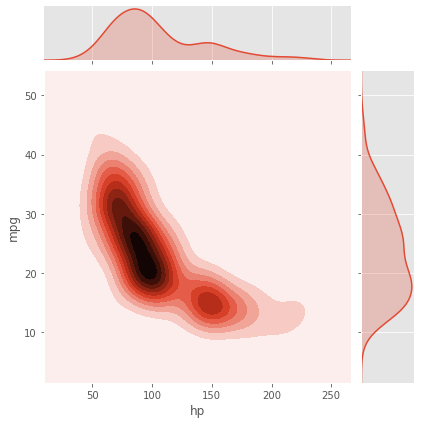

In [36]:
# ex 3
# Generate a joint plot of 'hp' and 'mpg' using a hexbin plot
sns.jointplot(x='hp', y='mpg', data=auto, kind='kde')

# Display the plot
plt.show()


## Multivariate data visualisation :: pairplot

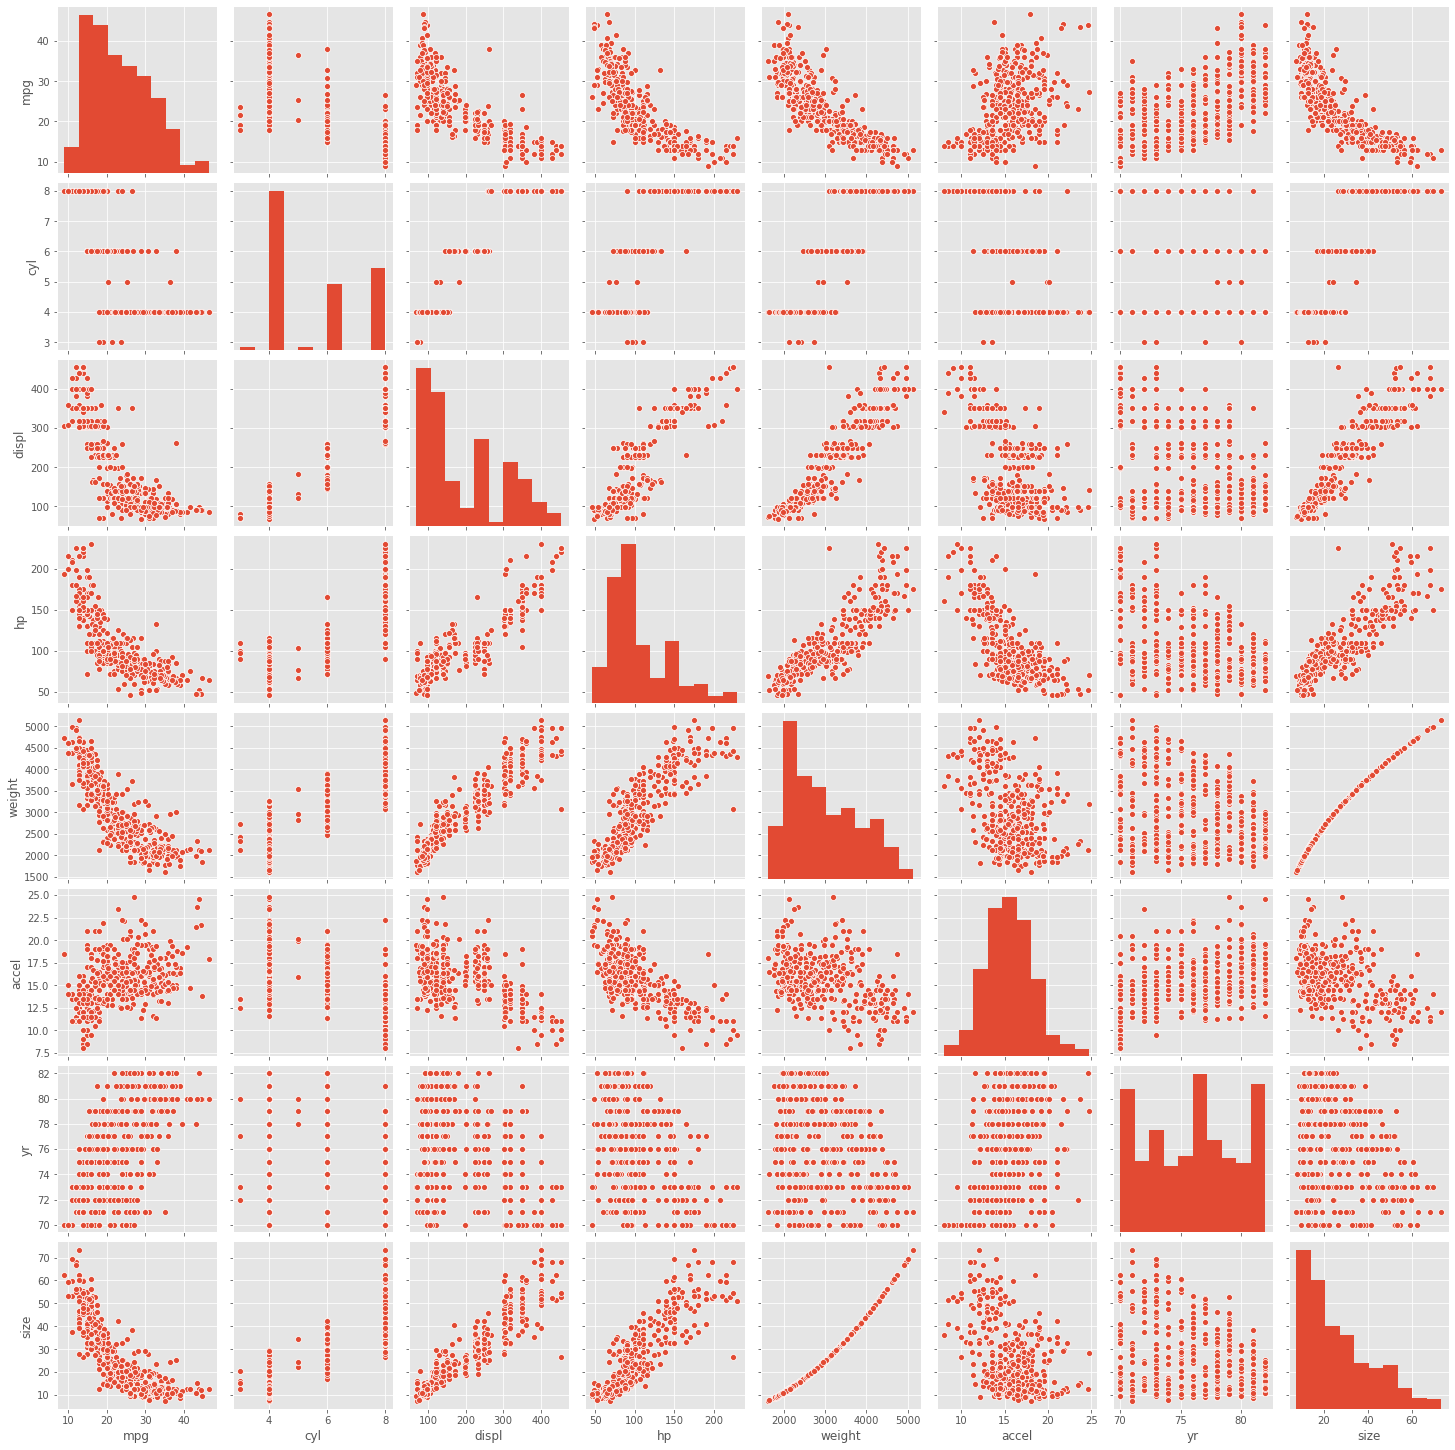

In [33]:
# ex 1
# Print the first 5 rows of the DataFrame
# print(auto.head())

# Plot the pairwise joint distributions from the DataFrame
sns.pairplot(auto)

# Display the plot
plt.show()

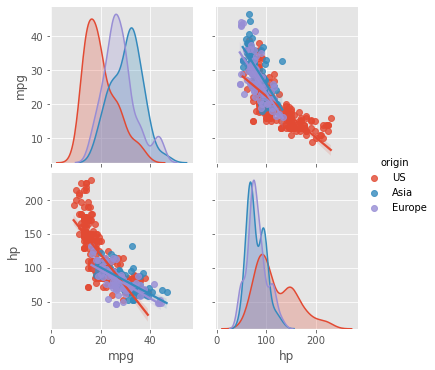

In [35]:
# ex 2
# Plot the pairwise joint distributions grouped by 'origin' along with regression lines
sns.pairplot(auto[['mpg', 'hp', 'origin']], hue='origin', kind='reg')

# Display the plot
plt.show()

## Multivariate data visualisation :: covariate matrix, heatmap

             mpg       cyl     displ        hp    weight     accel        yr  \
mpg     1.000000 -0.777618 -0.805127 -0.778427 -0.832244  0.423329  0.580541   
cyl    -0.777618  1.000000  0.950823  0.842983  0.897527 -0.504683 -0.345647   
displ  -0.805127  0.950823  1.000000  0.897257  0.932994 -0.543800 -0.369855   
hp     -0.778427  0.842983  0.897257  1.000000  0.864538 -0.689196 -0.416361   
weight -0.832244  0.897527  0.932994  0.864538  1.000000 -0.416839 -0.309120   
accel   0.423329 -0.504683 -0.543800 -0.689196 -0.416839  1.000000  0.290316   
yr      0.580541 -0.345647 -0.369855 -0.416361 -0.309120  0.290316  1.000000   
size   -0.806682  0.890839  0.928779  0.869720  0.992019 -0.426547 -0.325214   

            size  
mpg    -0.806682  
cyl     0.890839  
displ   0.928779  
hp      0.869720  
weight  0.992019  
accel  -0.426547  
yr     -0.325214  
size    1.000000  


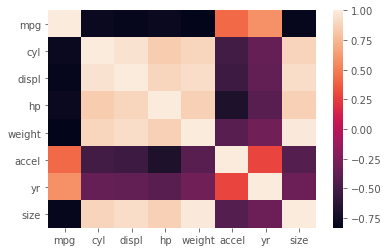

In [37]:
# ex 1
cov_matrix = auto.corr()
# Print the covariance matrix
print(cov_matrix)

# Visualize the covariance matrix using a heatmap
sns.heatmap(cov_matrix)

# Display the heatmap
plt.show()

# Time series visualisation

 ## Basic time series

Pandas time series: datetime as index
- Datetime: represents periods or time-stamps
- Datetime index: specialized slicing        
     e.g., weather[‘2010-07-04’]         
     e.g., weather[‘2010-03’:’2010-04’]        
     e.g., weather[‘2010-05’]          

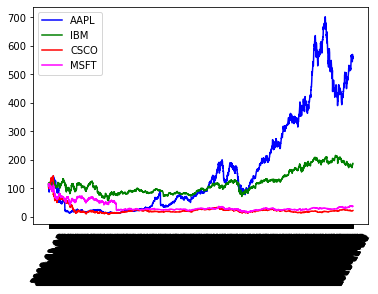

In [3]:
# ex1
# Plot the aapl time series in blue
plt.plot(aapl, color='blue', label='AAPL')

# Plot the ibm time series in green
plt.plot(ibm, color='green', label='IBM')

# Plot the csco time series in red
plt.plot(csco, color='red', label='CSCO')

# Plot the msft time series in magenta
plt.plot(msft, color='magenta', label='MSFT')

# Add a legend in the top left corner of the plot
plt.legend(loc='upper left')

# Specify the orientation of the xticks
plt.xticks(rotation=60)

# Display the plot
plt.show()

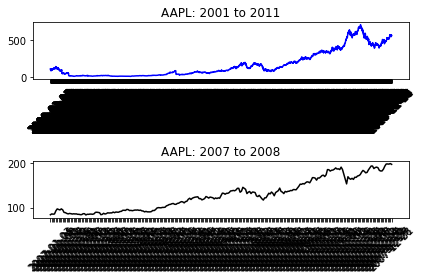

In [6]:
# ex2
# Plot the series in the top subplot in blue
plt.subplot(2,1,1)
plt.xticks(rotation=45)
plt.title('AAPL: 2001 to 2011')
plt.plot(aapl, color='blue')

# Slice aapl from '2007' to '2008' inclusive: view
view = aapl['2007':'2008']

# Plot the sliced data in the bottom subplot in black
plt.subplot(2,1,2)
plt.xticks(rotation=45)
plt.title('AAPL: 2007 to 2008')
plt.plot(view, color='black')
plt.tight_layout()
plt.show()

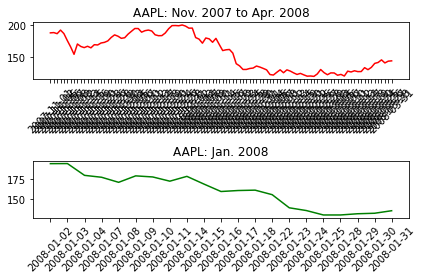

In [8]:
# ex3
# Slice aapl from Nov. 2007 to Apr. 2008 inclusive: view
view = aapl['2007-11':'2008-04']

# Plot the sliced series in the top subplot in red
plt.subplot(2,1,1)
plt.xticks(rotation=45)
plt.title('AAPL: Nov. 2007 to Apr. 2008')
plt.plot(view, color='red')

# Reassign the series by slicing the month January 2008
view = aapl['2008-01':'2008-02']

# Plot the sliced series in the bottom subplot in green
plt.subplot(2,1,2)
plt.xticks(rotation=45)
plt.title('AAPL: Jan. 2008')
plt.plot(view, color='green')

# Improve spacing and display the plot
plt.tight_layout()
plt.show()

## Selecting and formatting dates

In [ ]:
# ex 1
jan = aapl['2008-01':'2008-02']
# print every 4th date
dates = jan.index[::2]
print(dates)
labels = dates.strftime('%b %d')
print(labels)
# print the last 4 entries
print(jan.iloc[-4:])
print(dates.strftime('%b %d')[-4:])

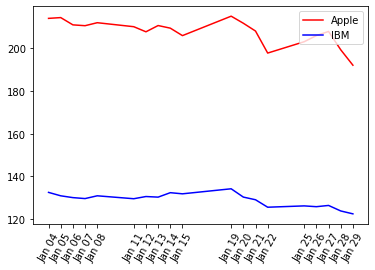

In [29]:
# ex 2
plt.plot(aapl['2010-01'], color='red', label='Apple')
plt.plot(ibm['2010-01'], color='blue', label='IBM')
dates = aapl['2010-01'].index[::1]
labels = dates.strftime('%b %d')
plt.xticks(dates, labels, rotation=60)
plt.legend(loc='upper right')
plt.show()

## Moving average calculation

In [ ]:
# moving average calculation
aapl =pd.Series(aapl)
# ma = co2_levels.rolling(window=52).mean()
mean_30 = pd.Series(aapl).rolling(window=30).mean()
mean_75 = pd.Series(aapl).rolling(window=75).mean()
mean_125 = pd.Series(aapl).rolling(window=125).mean()
mean_250 = pd.Series(aapl).rolling(window=250).mean()

std_30 = pd.Series(aapl).rolling(window=30).std()
std_75 = pd.Series(aapl).rolling(window=75).std()
std_125 = pd.Series(aapl).rolling(window=125).std()
std_250 = pd.Series(aapl).rolling(window=250).std()

# print(mean_30)
# type(mean_30)

## Moving average visualisation

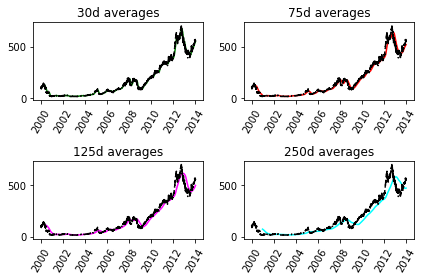

In [36]:
# ex 1
# Plot the 30-day moving average in the top left subplot in green
plt.subplot(2,2,1)
plt.plot(mean_30, color='green')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('30d averages')

# Plot the 75-day moving average in the top right subplot in red
plt.subplot(2,2,2)
plt.plot(mean_75, 'red')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('75d averages')

# Plot the 125-day moving average in the bottom left subplot in magenta
plt.subplot(2, 2, 3)
plt.plot(mean_125, 'magenta')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('125d averages')

# Plot the 250-day moving average in the bottom right subplot in cyan
plt.subplot(2, 2, 4)
plt.plot(mean_250, color='cyan')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('250d averages')

# Display the plot
plt.tight_layout()
plt.show()

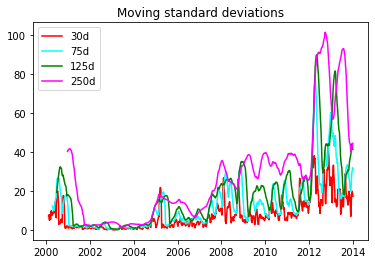

In [37]:
# ex 2

# Plot std_30 in red
plt.plot(std_30, color='red', label='30d')

# Plot std_75 in cyan
plt.plot(std_75, color='cyan', label='75d')

# Plot std_125 in green
plt.plot(std_125, color='green', label='125d')

# Plot std_250 in magenta
plt.plot(std_250, color='magenta', label='250d')

# Add a legend to the upper left
plt.legend(loc='upper left')

# Add a title
plt.title('Moving standard deviations')

# Display the plot
plt.show()